## In this project, we want to predict whether a user will click on an ad on a website or not.
## We used logistic regression and Neural Network for clasfication.
## And compare the accuracy

In [1]:
# importing necessary packages/library for the project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import random

Using TensorFlow backend.


# Predicting using logistic regression (Building model from scratch)

In [2]:
# Getting the dataset
df = pd.read_csv('advertising.csv')

In [65]:
df.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/16 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/16 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/16 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/16 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/16 3:36,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,5/19/16 14:30,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,1/28/16 20:59,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,3/7/16 1:40,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,4/18/16 9:33,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,7/11/16 1:42,0


In [67]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/16 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/16 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/16 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/16 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/16 3:36,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,5/19/16 14:30,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,1/28/16 20:59,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,3/7/16 1:40,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,4/18/16 9:33,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,7/11/16 1:42,0


In [7]:
df.shape

(1000, 10)

In [83]:
# Numerical data
# df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'Clicked on Ad']]

In [85]:
# Categorical data
# df[['City','Country','Timestamp','Ad Topic Line']]

In [100]:
print('Unique values in City column =',df['City'].nunique(), '\nUnique values in Country column =' , df['Country'].nunique(), '\nUnique values in Ad Topic Line column =' , df['Ad Topic Line'].nunique())

Unique values in City column = 969 
Unique values in Country column = 237 
Unique values in Ad Topic Line column = 1000


In [8]:
# Droping the columns which doesn't have numerical values, So it will not be usefull
df2 = df.drop(['City', 'Country', 'Timestamp', 'Ad Topic Line'], axis=1).copy()

In [9]:
df2

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0
5,59.99,23,59761.56,226.74,1,0
6,88.91,33,53852.85,208.36,0,0
7,66.00,48,24593.33,131.76,1,1
8,74.53,30,68862.00,221.51,1,0
9,69.88,20,55642.32,183.82,1,0


Text(0.5, 1.0, 'Daily Internet Usage')

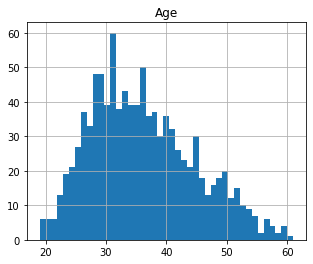

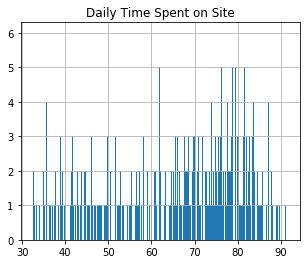

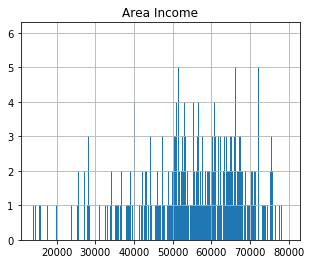

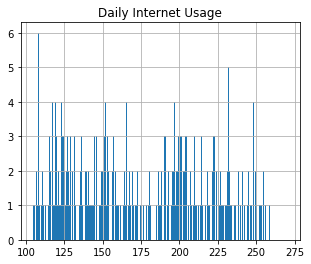

In [133]:
# Visulaizing the data

plt.figure(figsize=(5, 4))
df2['Age'].hist(bins=df2['Age'].nunique())
plt.title('Age')

plt.figure(figsize=(5, 4))
df2['Daily Time Spent on Site'].hist(bins=df2['Daily Time Spent on Site'].nunique())
plt.title('Daily Time Spent on Site')

plt.figure(figsize=(5, 4))
df2['Area Income'].hist(bins=df2['Area Income'].nunique())
plt.title('Area Income')

plt.figure(figsize=(5, 4))
df2['Daily Internet Usage'].hist(bins=df2['Daily Internet Usage'].nunique())
plt.title('Daily Internet Usage')

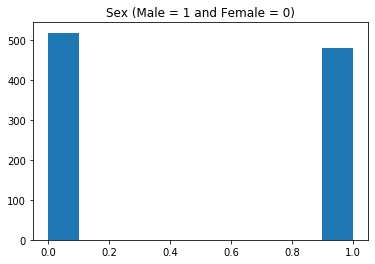

In [146]:
plt.hist(df2['Male'])
plt.title('Sex (Male = 1 and Female = 0)')
plt.show()

In [147]:
# click_ad_count = Counter(df2['Age'])
# print(click_ad_count)

# click_ad_count = Counter(df2['Daily Time Spent on Site'])
# print(click_ad_count)

# click_ad_count = Counter(df2['Daily Internet Usage'])
# print(click_ad_count)

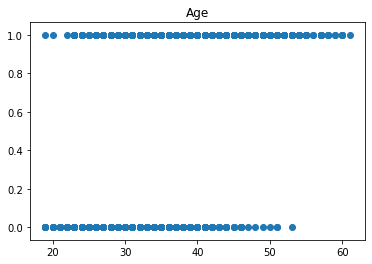

In [109]:
plt.scatter(df2['Age'], df2['Clicked on Ad'])
plt.title('Age')
plt.show()

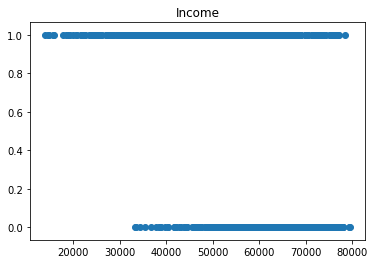

In [110]:
plt.scatter(df['Area Income'], df['Clicked on Ad'])
plt.title('Income')
plt.show()

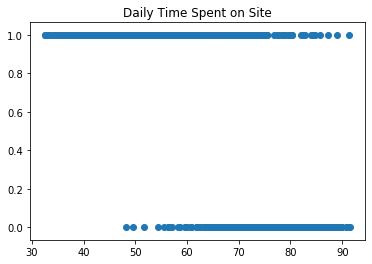

In [111]:
plt.scatter(df['Daily Time Spent on Site'], df['Clicked on Ad'])
plt.title('Daily Time Spent on Site')
plt.show()

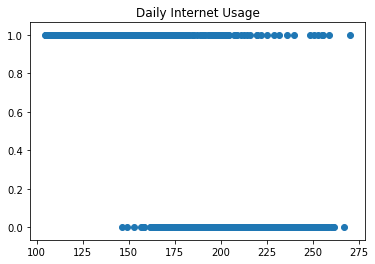

In [112]:
plt.scatter(df['Daily Internet Usage'], df['Clicked on Ad'])
plt.title('Daily Internet Usage')
plt.show()

In [10]:
# Making a numpy array from the dataset
X = np.vstack((np.ones(len(df2)),
               df2['Daily Time Spent on Site'],  
               df2['Age'], 
               df2['Area Income']/10000, # here I divide Income by 10000 to make numbers smaller
               df2['Daily Internet Usage'],
               df2['Male'])).astype(np.float32)

In [11]:
X

array([[  1.      ,   1.      ,   1.      , ...,   1.      ,   1.      ,
          1.      ],
       [ 68.95    ,  80.23    ,  69.47    , ...,  51.63    ,  55.55    ,
         45.01    ],
       [ 35.      ,  31.      ,  26.      , ...,  51.      ,  19.      ,
         26.      ],
       [  6.18339 ,   6.844185,   5.978594, ...,   4.241572,   4.192079,
          2.98758 ],
       [256.09    , 193.77    , 236.5     , ..., 120.37    , 187.95    ,
        178.35    ],
       [  0.      ,   1.      ,   0.      , ...,   1.      ,   0.      ,
          0.      ]], dtype=float32)

In [12]:
X.shape

(6, 1000)

In [13]:
X2 = X.T.copy()

In [14]:
X2.shape

(1000, 6)

In [15]:
# labels
y = np.array(df2['Clicked on Ad'])

In [16]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [17]:
# counting the values in Clicked on Ad column

click_ad_count = Counter(y)
click_ad_count

Counter({0: 500, 1: 500})

In [18]:
y.shape

(1000,)

In [19]:
# defining a function to calculte Sigmoid function
def sigmoid(scores):
    
    logits = 1/(1+np.exp(-scores))
    
    return logits

In [20]:
# defining a function to calculate the cost
def costFunction(features,labels,weights):
    
    m = len(features)

    probabilty = sigmoid(np.dot(features, weights))
    
    cost = (-(1/m)) * np.sum((labels * np.log(probabilty)) + (1-labels) * np.log(1 - probabilty))
    
    return cost

In [21]:
weight = np.zeros(X2.shape[1])

In [22]:
weight

array([0., 0., 0., 0., 0., 0.])

In [23]:
weight.shape

(6,)

In [24]:
costFunction(X2,y,weight)

0.6931471805599454

In [25]:
# defining a function to calculate the gradient descent
def logistic_regression(features, target, num_steps, learning_rate):
    
    m = features.shape[0]
    n = features.shape[1]
    weights = np.zeros(n)

    for i in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)/m
        weights += learning_rate * gradient
        
        # Print Cost Function every so often
#         if num_steps % 100 == 0:
#             print (costFunction(features, target, weights))
        
    return weights

In [26]:
Theta_hat = logistic_regression(X2,y,10000,0.01)
print(Theta_hat)

[ 2.17947294 -0.89003988  3.26174565 -1.32698212 -0.46067311  0.5892162 ]


In [27]:
# after going thru the dataset and calculating the cost and gradient descent, 
# Now its time to predict, whethter a user clicked an ad on the website or not.
y_hat = np.dot(X2,Theta_hat)

In [28]:
y_hat

array([-7.12066998e+01, -6.58718398e+01, -9.17288895e+01, -8.91847385e+01,
       -5.82351691e+01, -8.79879310e+01, -7.24483959e+01,  3.66280710e+01,
       -7.68951750e+01, -8.62569530e+01,  5.73368266e+01, -6.51303787e+01,
        3.84489358e+01, -9.58703547e+01,  1.34517543e+00, -5.03977467e+01,
        1.07726661e+01, -3.29783457e+01,  1.28420003e+01,  1.27242888e+00,
       -8.01004496e+01, -7.06835253e+01,  5.45990418e+01, -6.23871728e+01,
        1.28873596e+01, -7.89279738e+01, -1.59421913e+01,  5.82841389e+01,
       -8.65462302e+00, -9.65093866e+01, -7.31072540e+01, -8.44414698e+01,
        5.47767715e+01, -7.42276828e+01,  6.96951186e+01, -7.60695878e+01,
        5.49025044e+01, -4.15794902e+01,  4.53364519e+01,  1.64220852e+01,
       -7.98580931e+01, -8.13330377e+01, -6.63995252e+01, -7.55548007e+01,
       -8.99046433e+01,  5.21152547e+01, -9.38975657e+01, -3.40184046e+01,
        2.00070378e+01,  4.70367653e+01, -8.61277138e+01, -8.91927818e+01,
        2.36256467e+01,  

In [29]:
# Putting value 1 in y_hat if the predicted value (y_pred) is greater then 0.5 and other is 0
# So number 1 indicates that user clicked the ad
# And number 0 indicates that user didn't clicked the ad
y_pred = (y_hat >= 0.5).astype(int)

In [30]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Counter({0: 652, 1: 348})


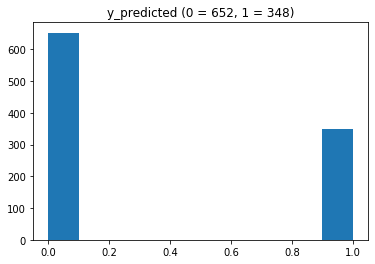

Counter({0: 500, 1: 500})


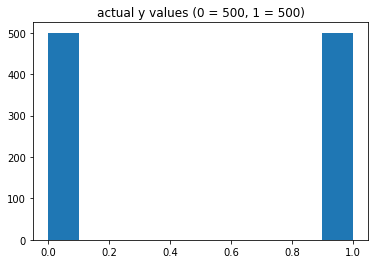

In [155]:
# Comparing the y_pred values with actual y values

click_ad_count = Counter(y_pred)
print(click_ad_count)

plt.hist(y_pred)
plt.title('y_predicted (0 = 652, 1 = 348)')
plt.show()

click_ad_count = Counter(y)
print(click_ad_count)

plt.hist(y)
plt.title('actual y values (0 = 500, 1 = 500)')
plt.show()

In [32]:
# Calculating the accuracy by comparing the original y values and predicted y values

accuracy = accuracy_score(y, y_pred)
print('Accuracy: %.2f%%' % (accuracy*100.0))

Accuracy: 84.40%


## <span style="color:red">Got 84.40% Accuracy when creating logistic regression model from scratch</span>


# Predicting using Logisctic regression model from sklearn library

In [33]:
# Splitting the training and test data
# Assigning 33% of data for testing and rest for training the model

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.33, random_state=42) 

In [34]:
print(X2.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape)

(1000, 6) (670, 6) (330, 6) (1000,) (670,) (330,)


In [35]:
# Logistic regression model from sklearn libarary

logreg = LogisticRegression()

In [36]:
# Training the model by fitting the training data into the logistic regression model

model = logreg.fit(X_train,y_train)
model

/Users/bhavinpanchani/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
# Predicting the values using only the test data

lr_y_predicted = logreg.predict(X_test)

In [38]:
# predicted y values

lr_y_predicted

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,

In [39]:
# original y values

y_test

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,

Counter({0: 173, 1: 157})


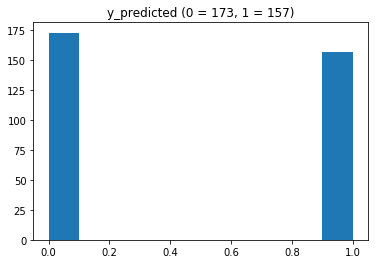

Counter({1: 168, 0: 162})


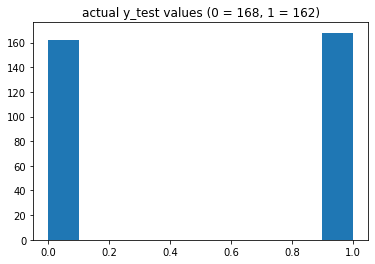

In [158]:
# Comparing the predicted values with the actual values

click_ad_count = Counter(lr_y_predicted)
print(click_ad_count)

plt.hist(lr_y_predicted)
plt.title('y_predicted (0 = 173, 1 = 157)')
plt.show()

click_ad_count = Counter(y_test)
plt.title('actual y_test values (0 = 168, 1 = 162)')
print(click_ad_count)

plt.hist(y_test)
plt.show()

In [41]:
# Calculating the accuracy by comparing the original y_test values and predicted y values

accuracy = accuracy_score(y_test, lr_y_predicted)
print('Accuracy: %.2f%%' % (accuracy*100.0))

Accuracy: 94.85%


## <span style="color:red">Got 94.85% Accuracy when using logistic regression model from sklearn library</span>

# Predicting using Neural Network using Sklearn library

In [42]:
# Getting number of columns for X_train for the input layer of the neural network

X_train.shape[1]

6

In [43]:
# Designing the neural network using keras library

model = Sequential()
model.add(Dense(12, input_dim = 6, activation='sigmoid'))
model.add(Dense(6, input_dim = 12, activation='tanh'))
model.add(Dense(1, input_dim = 6, activation='sigmoid'))

In [44]:
# Compiling the model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [179]:
# Training the model by fitting the training data into the neural network

trained_model = model.fit(X_train, y_train, epochs=200, batch_size=6, validation_split=0.1, verbose=1)

Train on 603 samples, validate on 67 samples
Epoch 1/200
603/603 [==============================] - 0s 359us/step - loss: 0.0910 - accuracy: 0.9718 - val_loss: 0.0929 - val_accuracy: 0.9701
Epoch 2/200
603/603 [==============================] - 0s 269us/step - loss: 0.0881 - accuracy: 0.9668 - val_loss: 0.0738 - val_accuracy: 0.9701
Epoch 3/200
603/603 [==============================] - 0s 293us/step - loss: 0.1059 - accuracy: 0.9635 - val_loss: 0.0680 - val_accuracy: 0.9851
Epoch 4/200
603/603 [==============================] - 0s 291us/step - loss: 0.1038 - accuracy: 0.9668 - val_loss: 0.0940 - val_accuracy: 0.9552
Epoch 5/200
603/603 [==============================] - 0s 286us/step - loss: 0.0979 - accuracy: 0.9701 - val_loss: 0.0747 - val_accuracy: 0.9701
Epoch 6/200
603/603 [==============================] - 0s 341us/step - loss: 0.0957 - accuracy: 0.9685 - val_loss: 0.0989 - val_accuracy: 0.9701
Epoch 7/200
603/603 [==============================] - 0s 335us/step - loss: 0.1347 -

Epoch 57/200
603/603 [==============================] - 0s 274us/step - loss: 0.0879 - accuracy: 0.9701 - val_loss: 0.0903 - val_accuracy: 0.9701
Epoch 58/200
603/603 [==============================] - 0s 255us/step - loss: 0.0874 - accuracy: 0.9668 - val_loss: 0.0719 - val_accuracy: 0.9701
Epoch 59/200
603/603 [==============================] - 0s 296us/step - loss: 0.1123 - accuracy: 0.9652 - val_loss: 0.0783 - val_accuracy: 0.9701
Epoch 60/200
603/603 [==============================] - 0s 303us/step - loss: 0.0969 - accuracy: 0.9635 - val_loss: 0.0831 - val_accuracy: 0.9701
Epoch 61/200
603/603 [==============================] - 0s 309us/step - loss: 0.0974 - accuracy: 0.9668 - val_loss: 0.0732 - val_accuracy: 0.9701
Epoch 62/200
603/603 [==============================] - 0s 284us/step - loss: 0.0909 - accuracy: 0.9701 - val_loss: 0.0694 - val_accuracy: 0.9851
Epoch 63/200
603/603 [==============================] - 0s 264us/step - loss: 0.0886 - accuracy: 0.9751 - val_loss: 0.0811 -

603/603 [==============================] - 0s 292us/step - loss: 0.0915 - accuracy: 0.9751 - val_loss: 0.0933 - val_accuracy: 0.9701
Epoch 114/200
603/603 [==============================] - 0s 281us/step - loss: 0.0974 - accuracy: 0.9718 - val_loss: 0.0719 - val_accuracy: 0.9851
Epoch 115/200
603/603 [==============================] - 0s 280us/step - loss: 0.1015 - accuracy: 0.9619 - val_loss: 0.0776 - val_accuracy: 0.9701
Epoch 116/200
603/603 [==============================] - 0s 251us/step - loss: 0.0946 - accuracy: 0.9718 - val_loss: 0.0737 - val_accuracy: 0.9701
Epoch 117/200
603/603 [==============================] - 0s 272us/step - loss: 0.0997 - accuracy: 0.9635 - val_loss: 0.0796 - val_accuracy: 0.9701
Epoch 118/200
603/603 [==============================] - 0s 311us/step - loss: 0.0915 - accuracy: 0.9685 - val_loss: 0.0737 - val_accuracy: 0.9851
Epoch 119/200
603/603 [==============================] - 0s 270us/step - loss: 0.0873 - accuracy: 0.9735 - val_loss: 0.0723 - val_ac

Epoch 169/200
603/603 [==============================] - 0s 313us/step - loss: 0.1359 - accuracy: 0.9552 - val_loss: 0.0723 - val_accuracy: 0.9701
Epoch 170/200
603/603 [==============================] - 0s 282us/step - loss: 0.0907 - accuracy: 0.9735 - val_loss: 0.0712 - val_accuracy: 0.9701
Epoch 171/200
603/603 [==============================] - 0s 299us/step - loss: 0.0869 - accuracy: 0.9718 - val_loss: 0.0800 - val_accuracy: 0.9552
Epoch 172/200
603/603 [==============================] - 0s 286us/step - loss: 0.0954 - accuracy: 0.9718 - val_loss: 0.0969 - val_accuracy: 0.9701
Epoch 173/200
603/603 [==============================] - 0s 317us/step - loss: 0.0941 - accuracy: 0.9701 - val_loss: 0.0826 - val_accuracy: 0.9701
Epoch 174/200
603/603 [==============================] - 0s 265us/step - loss: 0.0939 - accuracy: 0.9685 - val_loss: 0.0727 - val_accuracy: 0.9851
Epoch 175/200
603/603 [==============================] - 0s 294us/step - loss: 0.0858 - accuracy: 0.9685 - val_loss: 0

In [180]:
# Predicting the y values by only using the test data

y_hat = trained_model.model.predict(X_test)

In [181]:
y_hat

array([[0.9998054 ],
       [0.99997437],
       [0.99996495],
       [0.9999455 ],
       [0.04225996],
       [0.814695  ],
       [0.05543473],
       [0.99997556],
       [0.03564637],
       [0.9999801 ],
       [0.02751857],
       [0.9999658 ],
       [0.99997926],
       [0.04476226],
       [0.9999759 ],
       [0.99998057],
       [0.99998176],
       [0.9999573 ],
       [0.09876452],
       [0.9999783 ],
       [0.02789534],
       [0.9998779 ],
       [0.99998033],
       [0.26466304],
       [0.02710344],
       [0.9999809 ],
       [0.07251691],
       [0.0247913 ],
       [0.99997926],
       [0.99996245],
       [0.2737197 ],
       [0.8307828 ],
       [0.03445622],
       [0.99981755],
       [0.99997973],
       [0.04368647],
       [0.03214997],
       [0.95253205],
       [0.99997485],
       [0.9999813 ],
       [0.06078574],
       [0.99997914],
       [0.91361576],
       [0.99997973],
       [0.042859  ],
       [0.12926258],
       [0.9997234 ],
       [0.999

In [182]:
# Converting the values
# values which is less then 0.5 will be 0, where 0 means the user did not click the ad
# values which is greater then or equal to 0.5 will be 1, where 1 means the user did click the ad

NN_y_predicted = (y_hat >= 0.5).astype(int)

In [183]:
NN_y_predicted

array([[1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
    

Counter({1: 168, 0: 162})


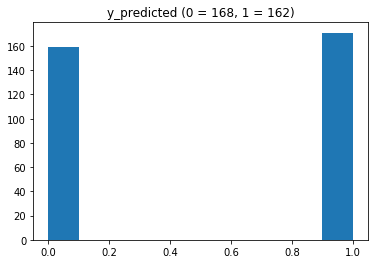

Counter({1: 168, 0: 162})


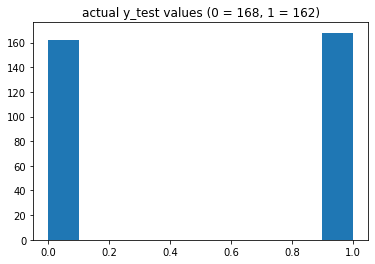

In [186]:
# NN_y_predicted[[0]].nunique()

values = np.count_nonzero(NN_y_predicted,axis=1)
click_ad_count = Counter(click_ad_count)
print(click_ad_count)

plt.hist(NN_y_predicted)
plt.title('y_predicted (0 = 168, 1 = 162)')
plt.show()

click_ad_count = Counter(y_test)
print(click_ad_count)

plt.hist(y_test)
plt.title('actual y_test values (0 = 168, 1 = 162)')
plt.show()

In [185]:
# Calculating the accuracy by comparing the original y_test values and predicted y values

accuracy = accuracy_score(y_test, NN_y_predicted)
print('Accuracy: %.2f%%' % (accuracy*100.0))

Accuracy: 96.06%


## <span style="color:red">Got 95.15% Accuracy when using Neural Network from Keras library</span>


# We got the best result using the Neural Network model from Keras Tensorflow library:  about 96% accuracy

# So we use that model to ask for input values and producing an output based on our trained model

## <span style="color:darkgreen">Generate random Input values and its corresponding Output value using the Testing data (X_test, y_test)</span>

In [69]:
random_column = random.randint(0,X_test.shape[0])

print("--- Input Values ---\n")
print(X_test[random_column])
print("\nDaily time spent on site = " + str(X_test[random_column][1]))
print("Age = " + str(X_test[random_column][2]))

X_test[random_column][3] = X_test[random_column][3] * 10000
print("Annual Income = " + str(X_test[random_column][3]))
print("Daily Internet Usage = " + str(X_test[random_column][4]))

if X_test[random_column][5] == 1:
    print("Sex = Male")
else:
    print("Sex = Female")

print("\n--- Expected output value ---\n")
print(y_test[random_column])

if y_test[random_column] == 1:
    print("\nUser is most likely to CLICK THE AD")
else:
    print("\nUser is most likely to NOT CLICK THE AD")

--- Input Values ---

[  1.        56.14      38.         3.268904 113.53       1.      ]

Daily time spent on site = 56.14
Age = 38.0
Annual Income = 32689.04
Daily Internet Usage = 113.53
Sex = Male

--- Expected output value ---

1

User is most likely to CLICK THE AD


# Asking for input values and producing an output based on our trained model

In [70]:
Daily_time_spent = input("Enter daily time spent on the site: ")
Age = input("Enter age: ")

Income = float(input("Enter annual income: "))
Income = Income / 10000

Daily_internet_usage = input("Enter daily internet usage: ")

Sex = input("Enter sex: ")
if Sex == 'Male' or Sex == 'male':
    Sex = 1
elif Sex == 'Female' or Sex =='female':
    Sex = 0

print("\n--- INPUT ---\n")

input_values = np.array([[1, Daily_time_spent, Age, Income, Daily_internet_usage, Sex]], dtype = float)
print(input_values)

# lr_y_predicted = logreg.predict(input_values)
NN_y_predicted = logreg.predict(input_values)

print("\n--- OUTPUT ---\n")
if lr_y_predicted[0] == 1:
#     print("Output produced by logistic regression model is "+ str(lr_y_predicted[0])+"\nUser is most likely to CLICK THE AD")
    print("Output produced by Neural Network model is "+ str(NN_y_predicted[0])+"\nUser is most likely to CLICK THE AD")
else:
#     print("Output produced by logistic regression model is "+ str(lr_y_predicted[0])+"\nUser is most likely to NOT CLICK THE AD")
    print("Output produced by Neural Network model is "+ str(NN_y_predicted[0])+"\nUser is most likely to NOT CLICK THE AD")

Enter daily time spent on the site: 56.14
Enter age: 38.0
Enter annual income: 32689.04
Enter daily internet usage: 113.53
Enter sex: male

--- INPUT ---

[[  1.        56.14      38.         3.268904 113.53       1.      ]]

--- OUTPUT ---

Output produced by Neural Network model is 1
User is most likely to CLICK THE AD
